In [29]:
import json
import os
import pandas as pd
import seaborn as sns
import numpy as np

from util.config import versioned

In [73]:
matched_all = versioned.read_parquet("matched.parquet")
matched_all = matched_all[matched_all["overall_score"] > 10.5]
def drop_duplicates(df, *cols):
    for col in cols:
        df = df[(~df[col].duplicated()) | df[col].isna()]
    return df.reset_index(drop=True)
matched_all = drop_duplicates(matched_all, "krs_name", "pkw_name", "wiki_name")
matched_all

,mistake_odds,unique_chance,overall_score,koryta_name,krs_name,pkw_name,wiki_name,birth_year,birth_date,employed_end,...,first_name_13,count_14,p_15,last_name_16,count_17,teryt,wiki_name_1,is_polityk_1,wiki_score,koryta_name_1
0,9.007199e+15,1.0,14.000000,None,Krzysztof Stanisław Planeta,Planeta Krzysztof Stanisław,None,1950,1950-05-11,[2005-05-11T00:00:00.000000],...,stanisław,2,4.556722e-08,planeta,3.0,14,None,None,NaN,None
1,9.007199e+15,1.0,14.000000,None,Krzysztof Stanisław Tronczyński,TRONCZYŃSKI Krzysztof Stanisław,None,1952,1952-05-08,[2013-10-30T00:00:00.000000],...,stanisław,2,4.556722e-08,tronczyński,3.0,10,None,None,NaN,None
2,4.503600e+15,1.0,14.000000,None,Damian Tomasz Fierla,Fierla Damian Tomasz,None,1964,1964-07-25,"[2024-01-22T00:00:00.000000, 2020-02-20T00:00:...",...,tomasz,2,4.556722e-08,fierla,2.5,24,None,None,NaN,None
3,4.503600e+15,1.0,14.000000,None,Marek Adam Soin,Soin Marek Adam,None,1945,1945-08-14,[2006-01-26T00:00:00.000000],...,adam,4,9.113444e-08,soin,2.5,12,None,None,NaN,None
4,3.002400e+15,1.0,14.000000,None,Adam Stanisław Myrda,Myrda Adam Stanisław,None,1951,1951-12-24,[2002-09-18T00:00:00.000000],...,stanisław,2,4.556722e-08,myrda,3.5,02,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,NaN,NaN,10.785398,None,Bogusław Smólski,None,Bogusław Ludwik Smólski,1947,1947-05-29,[2004-07-30T00:00:00.000000],...,None,<NA>,NaN,None,NaN,None,Bogusław Ludwik Smólski,None,0.785398,None
6203,NaN,NaN,10.785398,None,Franciszek Puchała,None,Franciszek Puchała,1941,1941-02-18,[2006-08-22T00:00:00.000000],...,None,<NA>,NaN,None,NaN,None,Franciszek Puchała,None,0.785398,None
6204,NaN,NaN,10.785398,None,Józef Stanisław Buczyński,None,Józef Stanisław Buczyński,1949,1949-01-02,[2001-11-23T00:00:00.000000],...,stanisław,2,4.556722e-08,None,NaN,None,Józef Stanisław Buczyński,None,0.785398,None
6205,NaN,NaN,10.785398,None,Mieczysław Bieniek,None,Mieczysław Bieniek,1951,1951-06-19,[2014-07-07T00:00:00.000000],...,None,<NA>,NaN,None,NaN,None,Mieczysław Bieniek,None,0.785398,None


In [ ]:
people_krs = pd.DataFrame(versioned.read_jsonl("people_krs.jsonl"))
people_krs

In [ ]:
people_pkw = pd.DataFrame(versioned.read_jsonl("people_pkw.jsonl"))
people_pkw

In [ ]:
employment_ends = pd.DataFrame({'employed_end': matched_all["employed_end"]})
employment_ends

In [74]:
import matplotlib.pyplot as plt

# 2. Convert the 'event_date' column to datetime objects
df['employed_end'] = pd.to_datetime(df['employed_end'])

# 3. Extract the year and count the occurrences
yearly_counts = df['employed_end'].dt.year.value_counts()

# 4. Sort the counts by year (the index) for a chronological chart
yearly_counts = yearly_counts.sort_index()

# 5. Create the bar chart
plt.figure(figsize=(8, 5))
ax = yearly_counts.plot(
    kind='bar',
    color='coral',
    title='Number of Events per Year'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0) # Keep year labels horizontal
plt.tight_layout()
plt.show()


KeyError: 'employed_end'

In [ ]:
import matplotlib.pyplot as plt

# 3. Extract the year and count the occurrences
company_counts = people_krs['employed_krs'].value_counts()

# 4. Sort the counts by year (the index) for a chronological chart
company_counts = company_counts.sort_values()

# 5. Create the bar chart
plt.figure(figsize=(8, 5))
ax = company_counts.plot(
    kind='bar',
    color='coral',
    title='Number of Events per Year'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0) # Keep year labels horizontal
plt.tight_layout()
plt.show()

company_counts

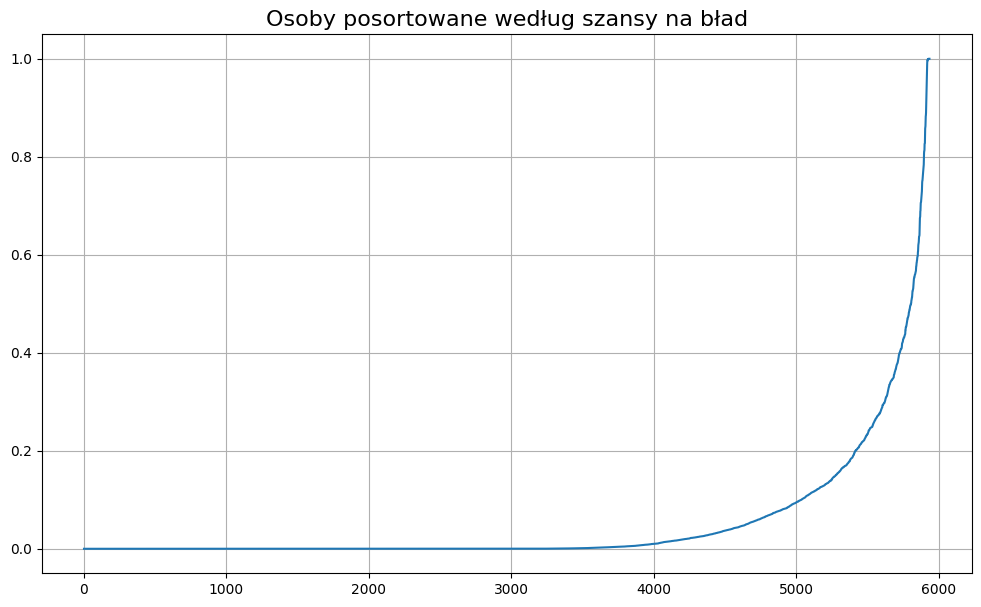

In [112]:
import matplotlib.pyplot as plt

unique_chance = 1 - matched_all["unique_chance"]
fig, ax = plt.subplots(figsize=(12, 7))
ax.grid(True)
ax.set_title('Osoby posortowane według szansy na bład', fontsize=16)
ax.plot(unique_chance)

<Axes: xlabel='People Considered (i)'>

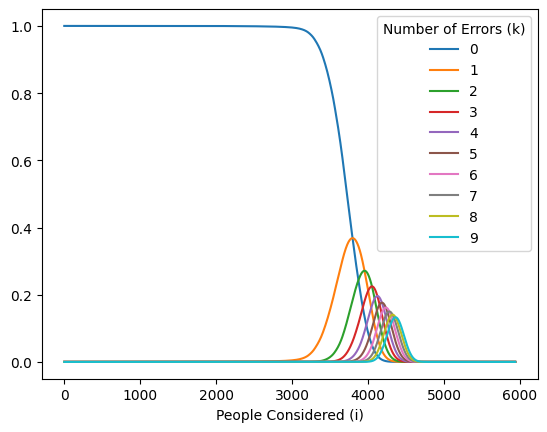

In [76]:
import numpy as np

def calculate_poisson_binomial_history(probabilities: pd.Series) -> pd.DataFrame:
    """
    Calculates the evolving probability distribution of the number of successes
    at each step of including a new trial.

    Args:
        probabilities: A pandas Series where each value is the probability
                       of success (e.g., an error) for that trial.

    Returns:
        A pandas DataFrame where:
        - The index 'i' represents the number of people considered (from 0 to n).
        - The column 'k' represents the number of errors.
        - The value at [i, k] is the probability of having exactly k errors
          after considering the first i people.
    """
    n = len(probabilities)
    # Initialize a 2D array to store the history of distributions.
    # Dimensions are (n+1) rows for each step, (n+1) cols for k errors.
    history = np.zeros((n + 1, n + 1))
    history[0, 0] = 1.0  # P(0 errors | 0 people) = 1

    # Iterate from the 1st person to the nth person
    for i in range(1, n + 1):
        p = probabilities.iloc[i-1]  # Get the probability for the current person
        prev_probs = history[i-1, :] # Get the distribution from the previous step

        # Vectorized update, same as before
        term1 = prev_probs * (1 - p)
        term2 = np.roll(prev_probs, 1) * p
        term2[0] = 0

        history[i, :] = term1 + term2

    # Convert the result to a labeled DataFrame
    df = pd.DataFrame(history)
    df.index.name = "People Considered (i)"
    df.columns.name = "Number of Errors (k)"
    return df

binom_2d = calculate_poisson_binomial_history(unique_chance)

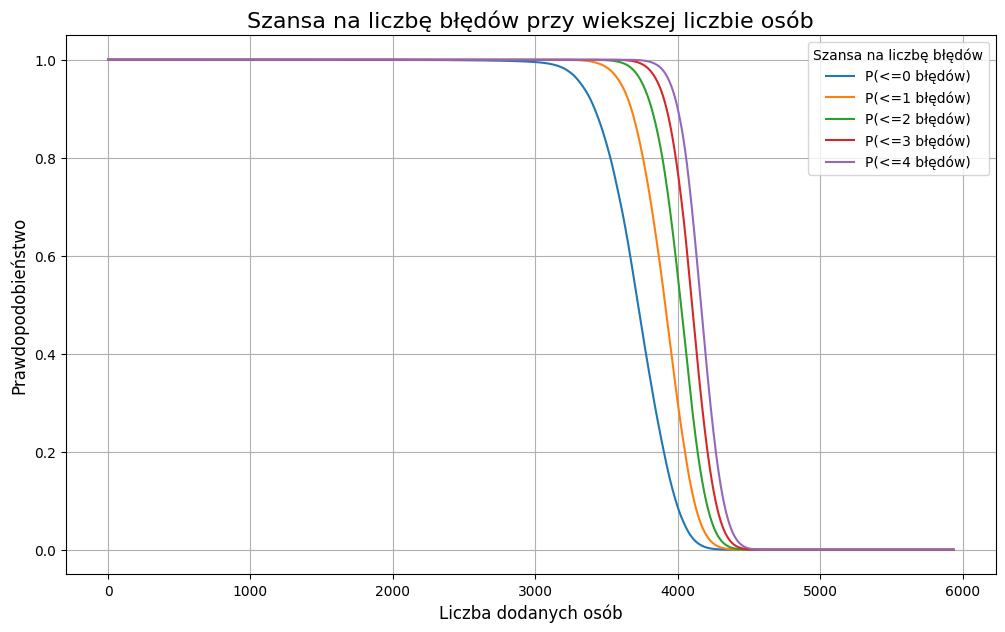

In [106]:
def show_distribution(df, label, num_errors_to_plot=10):
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Each is a column in our DataFrame
    for k in range(num_errors_to_plot):
        ax.plot(df.index, df[k], label=label.format(k=k))
    
    ax.set_title('Szansa na liczbę błędów przy wiekszej liczbie osób', fontsize=16)
    ax.set_xlabel('Liczba dodanych osób', fontsize=12)
    ax.set_ylabel('Prawdopodobieństwo', fontsize=12)
    ax.legend(title='Szansa na liczbę błędów')
    ax.grid(True)
    plt.show()
show_distribution(binom_2d.cumsum(axis=1), 'P(<={k} błędów)', num_errors_to_plot=5)

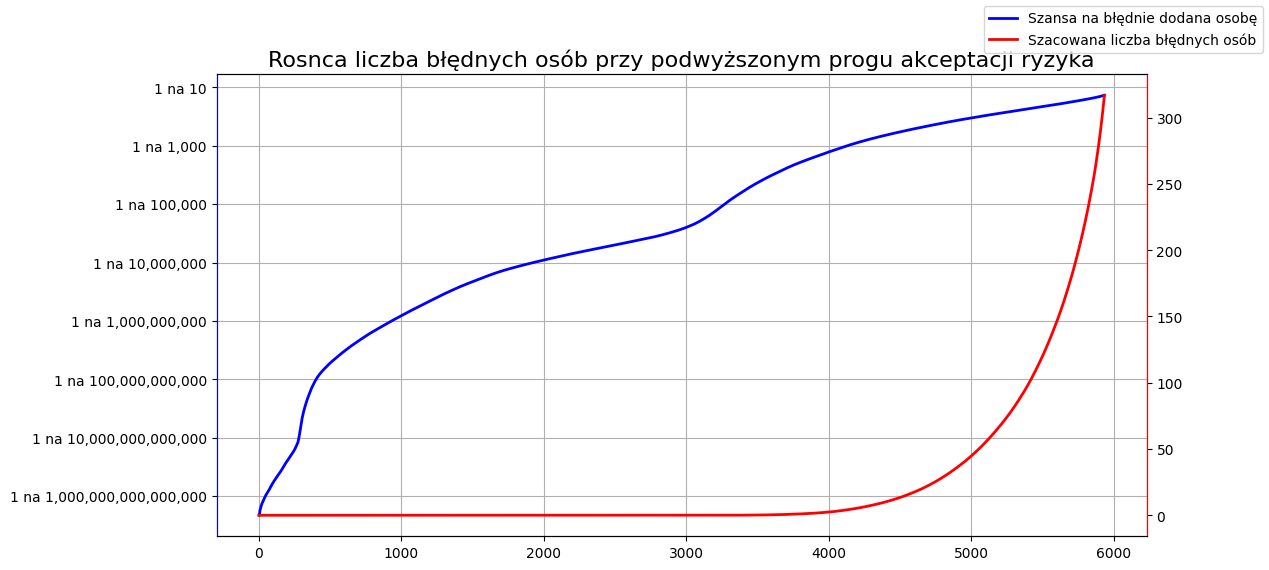

In [108]:
from matplotlib import ticker
import math

def reverse(x, pos):
    return f"1 na {math.ceil(1/x):,}"

def display_expected_error_count(unique_chance):
    expected_error_count = unique_chance.cumsum() # We use here linearity of expectation
    number_of_people = np.arange(len(expected_error_count))
    expected_error_rate = np.divide(expected_error_count, number_of_people)
    
    df = pd.DataFrame({
        "Expected number of errors": expected_error_count,
        "Expected error ratio": expected_error_rate,
    })
        
    fig, ax2 = plt.subplots(figsize=(12, 6))
    ax1 = ax2.twinx()
    ax1.plot(df.index, df["Expected number of errors"], 
            label='Szacowana liczba błędnych osób', color='red', linewidth=2)
    ax1.set_title('Rosnca liczba błędnych osób przy podwyższonym progu akceptacji ryzyka', fontsize=16)
    ax1.set_xlabel('Number of People Considered', fontsize=12)

    ax2.semilogy(df.index, df["Expected error ratio"], 
            label='Szansa na błędnie dodana osobę', color='blue', linewidth=2)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(reverse))
    ax1.spines['left'].set_color('blue')
    ax1.spines['right'].set_color('red')

    
    ax2.grid(True)
    fig.legend()
    plt.show()

display_expected_error_count(unique_chance)